# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Creating subset of cities in count of 50
n = 50
def divide_cities(cities, n):
    for i in range(0, len(cities), n):
        yield cities[i:i + n]
cities = list(divide_cities(cities, n))

601


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# list for response results
citynames = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

print("Begining Data Retrieval")
print("------------------------------")
    
# loop through cities, make API request, and append desired results
for idx1, city_list in enumerate(cities, start = 1):
    for idx2, city in enumerate(city_list):
        try:
            response = requests.get(query_url + city).json()
            print(f"Processing Record {idx2} of set {idx1} | {city}")
            citynames.append(response['name'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
        except KeyError:
            print("City not found. Skipping...")
    
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Begining Data Retrieval
------------------------------
Processing Record 0 of set 1 | olafsvik
Processing Record 1 of set 1 | marawi
Processing Record 2 of set 1 | katsuura
Processing Record 3 of set 1 | punta arenas
Processing Record 4 of set 1 | ushuaia
Processing Record 5 of set 1 | atuona
Processing Record 6 of set 1 | new norfolk
Processing Record 7 of set 1 | rikitea
Processing Record 8 of set 1 | boa vista
Processing Record 9 of set 1 | hilo
Processing Record 10 of set 1 | luderitz
Processing Record 11 of set 1 | mataura
Processing Record 12 of set 1 | uyuni
Processing Record 13 of set 1 | barrow
Processing Record 14 of set 1 | ilulissat
Processing Record 15 of set 1 | steinbach
Processing Record 16 of set 1 | kapaa
Processing Record 17 of set 1 | busselton
Processing Record 18 of set 1 | butaritari
Processing Record 19 of set 1 | soteapan
Processing Record 20 of set 1 | trinidad
Processing Record 21 of set 1 | alyangula
Processing Record 22 of set 1 | vaini
Processing Record 23

Processing Record 39 of set 4 | bar harbor
Processing Record 40 of set 4 | sikonge
Processing Record 41 of set 4 | esperance
Processing Record 42 of set 4 | cozumel
Processing Record 43 of set 4 | provideniya
Processing Record 44 of set 4 | itamarandiba
Processing Record 45 of set 4 | korla
Processing Record 46 of set 4 | padang
Processing Record 47 of set 4 | ardakan
Processing Record 48 of set 4 | oranjemund
Processing Record 49 of set 4 | cabo san lucas
Processing Record 0 of set 5 | avallon
Processing Record 1 of set 5 | kanash
Processing Record 2 of set 5 | saint anthony
Processing Record 3 of set 5 | te anau
Processing Record 4 of set 5 | virginia beach
Processing Record 5 of set 5 | anadyr
Processing Record 6 of set 5 | mana
Processing Record 7 of set 5 | mehamn
Processing Record 8 of set 5 | palana
Processing Record 9 of set 5 | itarema
Processing Record 10 of set 5 | kahului
Processing Record 11 of set 5 | iqaluit
Processing Record 12 of set 5 | castro
Processing Record 13 of 

Processing Record 33 of set 8 | changji
Processing Record 34 of set 8 | boralday
Processing Record 35 of set 8 | portland
Processing Record 36 of set 8 | pankovka
Processing Record 37 of set 8 | ascension
Processing Record 38 of set 8 | sorland
Processing Record 39 of set 8 | ormara
Processing Record 40 of set 8 | muika
City not found. Skipping...
Processing Record 41 of set 8 | jales
Processing Record 42 of set 8 | pozo colorado
Processing Record 43 of set 8 | kodaikanal
Processing Record 44 of set 8 | mount gambier
Processing Record 45 of set 8 | kitimat
Processing Record 46 of set 8 | praia
Processing Record 47 of set 8 | bodden town
Processing Record 48 of set 8 | sibolga
Processing Record 49 of set 8 | beloha
Processing Record 0 of set 9 | lagoa
Processing Record 1 of set 9 | andra
Processing Record 2 of set 9 | san angelo
Processing Record 3 of set 9 | coari
Processing Record 4 of set 9 | dragomiresti
Processing Record 5 of set 9 | lorengau
Processing Record 6 of set 9 | simao
Pr

Processing Record 22 of set 12 | pasighat
Processing Record 23 of set 12 | visnes
Processing Record 24 of set 12 | magadi
Processing Record 25 of set 12 | quatre cocos
Processing Record 26 of set 12 | araceli
Processing Record 27 of set 12 | khuzhir
Processing Record 28 of set 12 | miri
Processing Record 29 of set 12 | emba
Processing Record 30 of set 12 | rosa zarate
Processing Record 31 of set 12 | nome
Processing Record 32 of set 12 | arrifes
Processing Record 33 of set 12 | skagastrond
City not found. Skipping...
Processing Record 34 of set 12 | mastic beach
Processing Record 35 of set 12 | shache
Processing Record 36 of set 12 | gayeri
Processing Record 37 of set 12 | paamiut
Processing Record 38 of set 12 | tumannyy
City not found. Skipping...
Processing Record 39 of set 12 | mecca
Processing Record 40 of set 12 | eyl
Processing Record 41 of set 12 | anar darreh
City not found. Skipping...
Processing Record 42 of set 12 | juncos
Processing Record 43 of set 12 | tessalit
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:

# build a dataframe from the cities, lon,and pressure lists

weather_data = {"City": citynames
                ,"Lat": lat
                ,"Lon": lon
                ,"Temperature": temp
                ,"Humidity": humidity
                ,"Cloudiness": cloudiness
                ,"Windspeed": windspeed
                ,"Country": country
                ,"Date": date
               }
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Olafsvik,64.89,-23.71,40.62,75,27,23.24,IS,1603093413
1,Marawi,8.00,124.29,82.99,84,100,3.00,PH,1603093414
2,Katsuura,35.13,140.30,56.41,87,90,8.05,JP,1603093414
3,Punta Arenas,-53.15,-70.92,35.29,79,75,23.04,CL,1603093414
4,Ushuaia,-54.80,-68.30,33.80,80,40,35.57,AR,1603093279


In [22]:
weather_data.describe()

,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.129372,18.127684,62.033088,70.114901,51.473968,8.357361,1.603093e+09
std,32.761458,91.788995,21.067063,23.895555,39.761449,5.689293,7.344560e+01
min,-54.800000,-175.200000,-0.400000,8.000000,0.000000,0.810000,1.603093e+09
25%,-6.660000,-64.900000,46.000000,61.000000,4.000000,4.050000,1.603093e+09
50%,22.810000,24.880000,67.710000,77.000000,53.000000,6.930000,1.603093e+09
75%,48.010000,98.780000,78.800000,88.000000,90.000000,11.180000,1.603093e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,35.570000,1.603094e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
clean_weather_data = weather_data[weather_data["Humidity"]<=100.00]
clean_weather_data.describe()

,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.129372,18.127684,62.033088,70.114901,51.473968,8.357361,1.603093e+09
std,32.761458,91.788995,21.067063,23.895555,39.761449,5.689293,7.344560e+01
min,-54.800000,-175.200000,-0.400000,8.000000,0.000000,0.810000,1.603093e+09
25%,-6.660000,-64.900000,46.000000,61.000000,4.000000,4.050000,1.603093e+09
50%,22.810000,24.880000,67.710000,77.000000,53.000000,6.930000,1.603093e+09
75%,48.010000,98.780000,78.800000,88.000000,90.000000,11.180000,1.603093e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,35.570000,1.603094e+09


In [24]:
#  Get the indices of cities that have humidity over 100%.
clean_weather_data.head()

,City,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Olafsvik,64.89,-23.71,40.62,75,27,23.24,IS,1603093413
1,Marawi,8.00,124.29,82.99,84,100,3.00,PH,1603093414
2,Katsuura,35.13,140.30,56.41,87,90,8.05,JP,1603093414
3,Punta Arenas,-53.15,-70.92,35.29,79,75,23.04,CL,1603093414
4,Ushuaia,-54.80,-68.30,33.80,80,40,35.57,AR,1603093279


In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

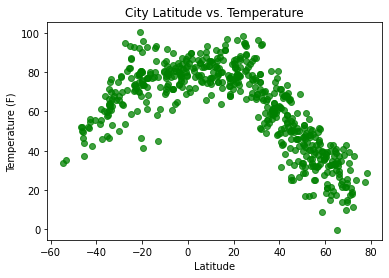

In [26]:

plt.scatter(lat, temp, marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()


## Latitude vs. Humidity Plot

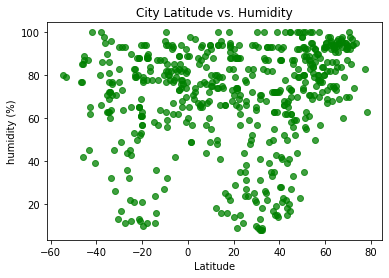

In [27]:
plt.scatter(lat, humidity, marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("humidity (%)")
plt.show()


## Latitude vs. Cloudiness Plot

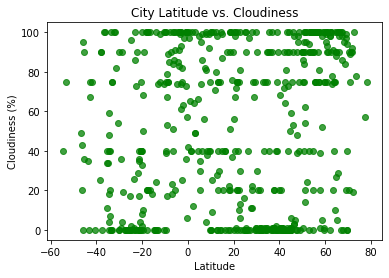

In [29]:
plt.scatter(lat, cloudiness , marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()


## Latitude vs. Wind Speed Plot

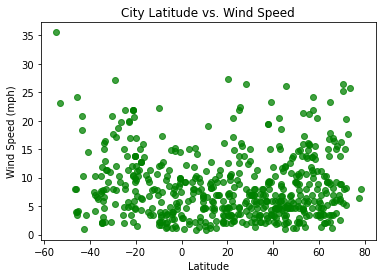

In [30]:
plt.scatter(lat, windspeed, marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()


## Linear Regression

In [34]:
weather_data_n = clean_weather_data[clean_weather_data["Lat"]>=0.00]
weather_data_s = clean_weather_data[clean_weather_data["Lat"]<0.00]
print(weather_data_n.count())
print(weather_data_s.count())

City           382
Lat            382
Lon            382
Temperature    382
Humidity       382
Cloudiness     382
Windspeed      382
Country        382
Date           382
dtype: int64
City           175
Lat            175
Lon            175
Temperature    175
Humidity       175
Cloudiness     175
Windspeed      175
Country        175
Date           175
dtype: int64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

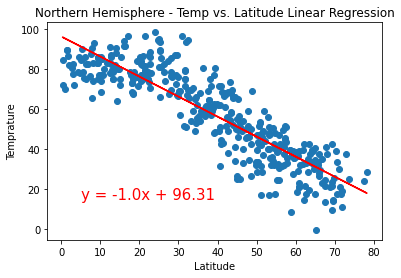

In [39]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

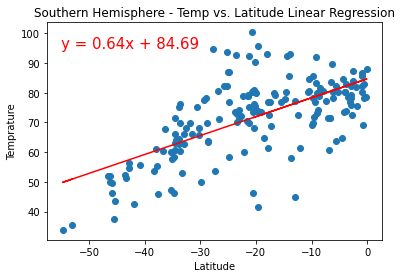

In [44]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title("Southern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

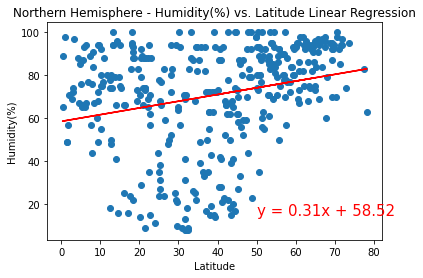

In [45]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

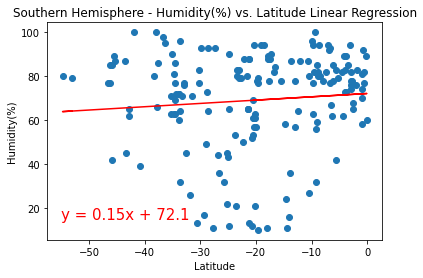

In [50]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

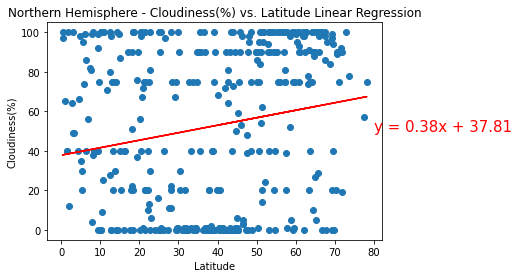

In [49]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(80,50),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

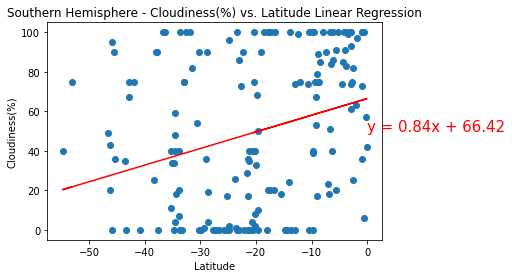

In [52]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

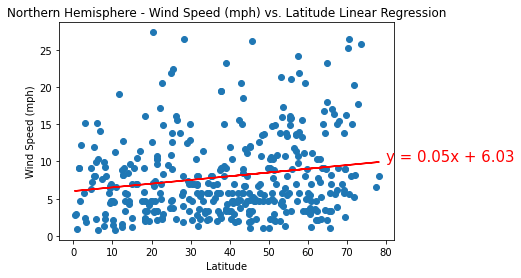

In [54]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(80,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

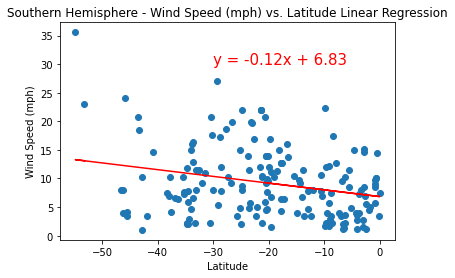

In [57]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()